
Lending Club is a peer-to-peer online lending platform. It is the world’s largest marketplace connecting borrowers and investors, where consumers and small business owners lower the cost of their credit and enjoy a better experience than traditional bank lending, and investors earn attractive risk-adjusted returns.Essentially, borrowers apply for loans and are assigned an interest rate by LendingClub. Individual investors are able to choose loans to fund or invest in, raising capital for a loan in a similar way to a crowd-sourcing campaign. As an investor, your returns vary based on the loans you choose (both the interest and default rates). Therefore, if you can better predict which borrowers will pay back their loans, you can expect better investment returns.

In this assignment, you will be analyzing data from LendingClub (<a href = "https://www.lendingclub.com/">www.lendingclub.com</a>). Using the lending data from 2007-2010, you need to create models that predict whether or not borrowers paid back their loan in full. The final model should minimize the number of borrowers who actually did not pay back their load in full but predicted as they did (this is our model selection criteria).


You need to create a Random Forest model and a Support Vector model using the same training/testing data. For both models, you need to optimize the parameters using a Grid Search. 
- For random forest, test the following number of trees in the forest: 10, 50, 100, 200, 300, 500, 800
- For svm, test the following:
    - C values: 0.1,1,10
    - gamma values: "auto","scale",
    - kernel: "poly",'linear','rbf'
    
Do not drop any of the features and make sure to scale them using StandardScaler (otherwise GridSearch for SVM will take a very very long time)

At the very bottom of your notebook, please explain how your models have performed and which model performed the best given the criteria.

Here are what the columns in the data represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion. Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 1 if the borrower did not pay back their loan in full, 0 if they paid back their loan in full.




# Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data



In [4]:
df = pd.read_csv('lending_club.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,1
1,1,all_other,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,1
2,1,all_other,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,1
3,1,debt_consolidation,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,1
4,1,debt_consolidation,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,1


In [5]:
df.shape

(9578, 14)

  There are 14 features and 9578 instances.

In [6]:
df.columns.values

array(['credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'], dtype=object)

# Exploratory Data Analysis

We start by checking if the dataset has missing values and the results show that there are no null values.

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


<Axes: >

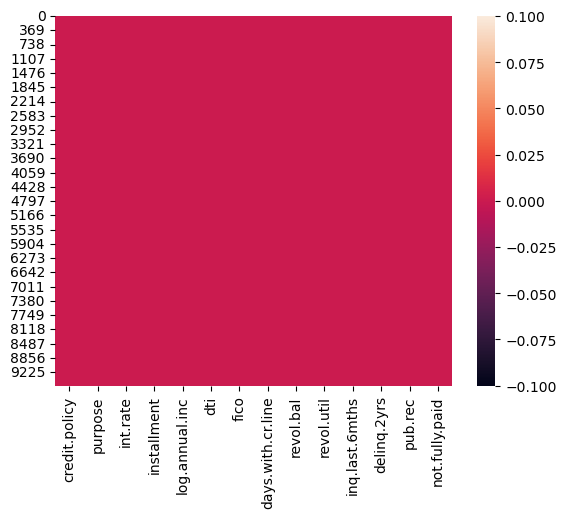

In [7]:
print(df.isna().sum())
sns.heatmap(df.isna())

In [8]:
df['purpose'].nunique()

7

<Axes: xlabel='not.fully.paid', ylabel='count'>

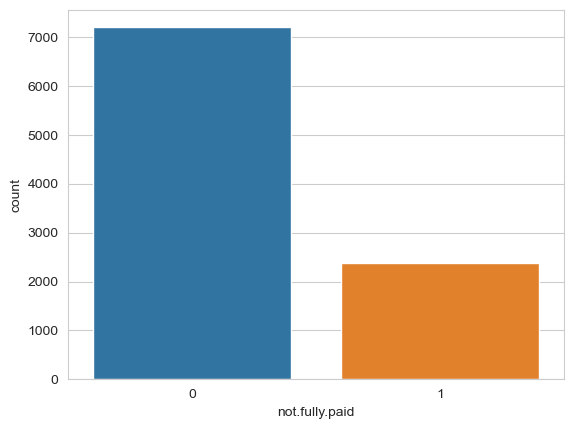

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='not.fully.paid',data=df)

In [10]:
# alternate way of checking
print("Total number: {}".format(df.shape[0]))
print("Paid: {}".format(df[df['not.fully.paid']==0].shape[0]))
print("Not Paid: {}".format(df[df['not.fully.paid']==1].shape[0]))

Total number: 9578
Paid: 7198
Not Paid: 2380


# Data Cleaning

We see that label column is categorical. We need to convert it into dummy variable before creating our model

In [11]:
purpose_dummy=pd.get_dummies(df["purpose"], drop_first=True)

In [12]:
purpose_dummy.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [13]:
df=pd.concat([df,purpose_dummy],axis=1)

In [14]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,1,0,1,0,0,0,0
1,1,all_other,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,1,0,0,0,0,0,0
2,1,all_other,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,1,0,0,0,0,0,0
3,1,debt_consolidation,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,1,0,1,0,0,0,0
4,1,debt_consolidation,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,1,0,1,0,0,0,0


In [15]:
X = df.drop(['purpose','not.fully.paid'],axis=1)
y = df["not.fully.paid"]

In [16]:
X. head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1670,674.53,10.887437,19.87,667,3904.958333,17176,73.4,1,0,0,0,1,0,0,0,0
1,1,0.0740,82.31,9.210340,1.20,807,3899.958333,82,2.3,0,0,0,0,0,0,0,0,0
2,1,0.1218,166.50,10.915088,22.45,702,1800.000000,16957,67.0,3,0,0,0,0,0,0,0,0
3,1,0.1287,420.42,10.545341,10.39,707,3119.958333,12343,67.8,0,0,0,0,1,0,0,0,0
4,1,0.1114,82.01,11.156251,18.09,712,8130.000000,14482,84.2,0,0,0,0,1,0,0,0,0


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: not.fully.paid, dtype: int64

# Train Test Split


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the data

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training 1st  model


In [20]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

# Predictions and Evaluation of 1st model


In [21]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1401   30]
 [ 415   70]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1431
           1       0.70      0.14      0.24       485

    accuracy                           0.77      1916
   macro avg       0.74      0.56      0.55      1916
weighted avg       0.75      0.77      0.71      1916



## GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ["auto","scale"],'kernel': ['poly''linear','rbf']} 

In [22]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1, gamma=auto, kernel=polylinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=auto, kernel=polylinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, gamma=auto, kernel=polylinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, gamma=auto, kernel=polylinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, gamma=auto, kernel=polylinear;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.753 total time=   2.7s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.753 total time=   3.0s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.753 total time=   2.9s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.753 total time=   2.8s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.753 total time=   3.7s
[CV 1/5] END C=0.1, gamma=scale, kernel=polylinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=polyli

C:\Users\mdfaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mdfaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mdfaz\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\mdfaz\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mdfaz\anaconda3\Lib\site-packages

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['polylinear', 'rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [29]:
grid.best_estimator_

SVC(C=100)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
grid_predictions = grid.predict(X_test)

In [34]:
print(confusion_matrix(y_test,grid_predictions))

[[1294  137]
 [ 262  223]]


In [35]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1431
           1       0.62      0.46      0.53       485

    accuracy                           0.79      1916
   macro avg       0.73      0.68      0.70      1916
weighted avg       0.78      0.79      0.78      1916



# Training 2nd model

In [44]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(criterion="entropy", n_estimators=1000)

In [45]:
r_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

# Predictions and Evaluation of 2nd model

In [51]:
from sklearn import metrics

In [52]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier()
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 500, 800]}
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 800}
Best Score: 0.8549996678810299


In [54]:
ypred = r_model.predict(X_test)

In [55]:
print(metrics.confusion_matrix(y_test,ypred))
print(metrics.classification_report(y_test,ypred))

[[1409   22]
 [ 195  290]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1431
           1       0.93      0.60      0.73       485

    accuracy                           0.89      1916
   macro avg       0.90      0.79      0.83      1916
weighted avg       0.89      0.89      0.88      1916



# Conclusion

The confusion matrix from SVM is interpreted as below:

|                |  Predicted paid | Predicted unpaid | Total |
|----------------|-------------------  | -------------------| ----- |
| Actual paid    | 1294  | 137  | 1431  |
| unpaid | 262  | 223 | 485  |

The confusion matrix from Random Forest model is interpreted as below:

|                |  Predicted paid | Predicted unpaid | Total |
|----------------|-------------------  | -------------------| ----- |
| Actual paid    | 1409  | 22  | 1431  |
| unpaid | 195  | 290 | 485  |

Random forest model worked more smoothly than support vactor machine model. SVM model was slower than RFM.
In SVM, it predicted 262 borrowers paid full where they actually didn not. In Random forest Model it predicted 195 borrowers paid in full where they actually did not.
Based on confusion matrix and clasification report, we can say that random forest model performed the best as it minimized the number of borrowers who actually did not pay back their loan in full but predicted as they did.